# Memo

# Memo about significant change

## Possible improvements
### Memo
- [x] （travel pattern の行動中の動きについて、うまく全部繋げられるか？現状次の行動の開始地点と前の行動の終了地点が一致しない） -> しようと思えば、終了地点と開始地点を揃えられるが、行動内で生じた誤差として考えてもいい気がする。
- [x] utils.update_multi_sensor_log 内の past_x, past_y により赤外線センサが人を動いているかを判定するところで,現状sampling_duration秒前の地点との差分を取っているが，もしもsampling_duration = 10 とすると，10秒前の地点との差分になってしまう->PIRセンサのサンプリングレートが長すぎるとそもそも実用的でないから、妥当な仮定のような気がする。
‐ [x] 経路計算のための distance の情報を計算した後に保存する際のsave json.dumps に MyEncoder 形式で保存するように変更した。また、generate_layout_with_necessary_furniture が繰り返しgenerate_layout を実行する際に、前のデータが完全に上書きされているかどうか確認していない（たぶん全部上書きされているため、不都合は起きないはず。）
- [x] 転倒には30秒かかるので、walkingが重ならないように、location[i]からlocation[i+1]へのpathで転倒する際には、location[i+1]での行動の行動時間が十分長い物を選ぶようにしている．
- [x] 時系列データを (start time of the parameter, value of the parameter) のリストで表現するか、(start time of the parameter, end time of the parameter, value of the parameter)のリストで表現するか。前者は情報量が削減でき，矛盾のチェックが時系列順に並んでいるかどうかだけで済む。後者は最後の期間のパラメータの終了時刻を明示できる（前者ではインデックスがiのパラメータはiの開始時刻からi+1の開始時刻までになるが、リストの最後の要素のパラメータは次の要素がないため、終了時刻がわからない.最後にダミー要素として0の値を持つ期間にすればなんとかなる？）。-> 後者にする．
- [x] フォルダ構造から再考（SISG4HEIALpha の階層的フォルダ構造いる？名前で(layout1)とか毎回指定してもよくない？）フォルダ名にある情報は全部 Semantic.json に入れる．
- [x] テキスト形式の保存に加えて pickle 等を用いて異常ラベルなどを保存する
- [x] ログのテキストファイルを入力として，リストのオブジェクトに読み込む方法
- [x] フォルダ名に家具や大きさいる？layoutだけ残すか，もしくは全てフラットにするか？その代わり，家具一覧や大きさ一覧は Semantic.json に組み込む.
- [x] utils.direct_path をきれいにする
- [x] PIRと圧力と家電センサのログからそれらを一つにまとめたものを作る関数
- [x] 移動経路のGUI足跡シミュレータ
- [x] 行動や異常の各パラメータ一覧を出力、保存 (pack)、再利用 (unpack) できる関数 -> pickle を使った

### Priorities
- [ ] utils 内の ActivityDataPoint などは activity_model に、WalkingTrajectory などは（新ファイルの） walking_model に分離したほうがよいか？activity_model　と anomaly_model で循環インポートになりそう。
- [ ] update_states_of_motion_sensors で temp_body_radius の変数名を間違えていたため、転倒時の体の幅が 2023/08/02 以前に作成したデータでは正確に反映されていない。 
- [ ] anomaly_model.forgetting_labels が遅い．頑張れば速くできそう
- [ ] 睡眠行動にトイレが断続的に入るパターンなどをモデル化する際には、現状の last_activity や sleep_after_24では対応できない。そのため、次の日の行動列も保存し、次の日の生成時にそれをコピーできるように作り変える必要がある。それか，睡眠にトイレ行動としてのサブ行動を許すか？
- [ ] 新しい家具の追加など、レイアウトの修正を後から簡単にできるようにする。
- [ ] Activity の所の 'Bed' などの場所名は floorplan とかに定数としておかなくて大丈夫か
- [ ] MMSE の幅が 1 month 以外でも使いやすいようにする


### Floor plan
- [ ] 自作クラス Zone, Wall, Furniture の活用
- [ ] dis_val のindex と実際のx, y の関係をわかりやすく。（参考、disval を作成する関数、または、Tools_.cal_I_J）
- [ ] ワンルームでなくて、壁がある場合はどうするのか？単純にdisval を100に設定するのか？2階など複雑な住居はどうするのか？
- [ ] 間取りを修正できるようにする．

### Activity schedule
- [ ] 行動列の円グラフ「1日の0:00から3日の0:00まで」とかの切りのいい時はうまくいくが、それ以外の微妙な時刻からの開始・終了にも対応する
- [ ] activity sequence 生成の行動の開始時刻や継続時間のサンプリングの記述を整頓する。例として、Activity.sampling_duration にはremainder と開始時間を入力に取るようにしたり、基本行動の開始時刻のサンプリングを切断正規分布を用いたり、day_schedule.update_schedule 内に短い行動を防ぐ例外処理をまとめたりする。
- [ ] 拡張1. 既に行動 B と C が決まっている場合、行動 A を (1) もしくは (2) のどちらかの条件を満たすように入れる。 (1) A が B と C の間にないといけない。 (2) A が B と C の間にあってはいけない。 拡張2. (1)行動 A が行動 B から T_c [分]よりも離れている。(2) 行動 A が行動 B からT_c [分]以内に作られる。拡張1と拡張2を合わせて考えると、拡張 1_2 : 行動 A が行動 B の前（または後ろ）の M[分]以内に存在する（または存在しない）。を実装できればよい？ただし、拡張1_2の形式にすると、夕食後睡眠前に取る行動Aを実装するには、事前にMを指定できず、既にサンプリングした夕食の終了時刻と睡眠の開始時刻に依存する。
- [ ] 拡張した行動をもう少しわかりやすい形で整頓する（MetaActivity をわかりやすくする。）
- [ ] activity.dertermine_place() の Notes に書かれているように、行動場所の選択にランダム性を追加する拡張。
- [ ] 基本行動間の分布の重なり度合いから，リサンプリングがうまくいきそうかどうかを事前に警告する．FundamentalActivity.sampling_start_time() 内のlower_limitの例外に該当しそうかどうかもこの事前のうちに済ませておく．

### Walking trajectory
- [ ] 異なるwalking 同士が重なってしまうエラー（A->B->C の移動において，A->B と B->C が重なってしまう現象）の改善方法。案1. 極端に短い行動時間の行動をうまく消す？ 案2. 移動経路を作成する段階で、もしも移動が重なる場合、後ろの行動の開始時刻をずらすことで対応する。修正した行動列も一緒に出力する。

### Sensors
- [ ] ドアセンサ実装
- [ ] 圧力センサが行動終了時に消すか消さないかをセンサデータ生成時に行動の種類によって分ける。例として、睡眠（ベッドに上る）やトイレ，外出（そこにとどまらない）は圧力センサを切る，反対に調理や机の下などはセンサをオンにするなど.
- [ ] 現状家電センサは行動時間中にセンサがついているとしているが，次の行動への歩き初めには消したり，行動時間中でもランダムにつけたり消したりするようにする
- [ ] センサごとにサンプリングレートが異なる拡張
- [ ] 各センサの出力をベルヌーイ分布などで誤差を加える．

### Anomalies
- [ ] 転倒に関して、転びやすい場所を discomfortable value を用いて実現できるか？
- [ ] sensor_model.Sensor とActivity.home_equipment と calculate_sensor_record_of_a_home_equipment あたりの家電センサの記述を連携させられるか
- [ ] 現状閉じこもりと準寝たきりが同時に発生した時の外出回数の減少は、準寝たきりによる減少を優先している。同時に（行動の統計量に影響を与える）複数の異常が発生した時の優先順位をどう決めるかをわかりやすくしたい。

### Others
- [ ] start, end を持つ時間区間に関してのクラス utils.TimeInterval を活用するか？duration()やincludes(t)（timedeltaオブジェクトがstart, endの間に入るか）などの関数がある。
- [ ] 全体的にパラメータ名をもう少し短く簡潔にし、docstring をきれいに書く。
- [ ] 足跡シミュレータが指定した時間から始められるようにする

# Import libralies

In [2]:
import time
from pathlib import Path
from datetime import timedelta
import matplotlib.pyplot as plt
import numpy as np

# self-made
import analysis
import anomaly_model

import utils

working_path = Path().resolve()
layout_data_path = working_path / "layout_data"

# Analyze long-term data

## data pre-processing

In [3]:
# Load sensor data and anomaly labels

data_folder_name = "test_data_2"
path = Path(layout_data_path / "test_layout" / data_folder_name)  # data path
SD = utils.pickle_load(path, "SD")
AL = utils.pickle_load(path, "AL")
AL_periods = analysis.make_AL_periods(path)
print(SD[:3])
print(analysis.memory_size(SD))
print(AL.keys())

# make data of matrix form

temp_time = time.time()
start = timedelta(days=0)
end = timedelta(days=360 * 9)
seconds = 1
duration = timedelta(seconds=seconds)
_type = "last-fired"
(SD_mat, SD_names, AL_mat, AL_names) = analysis.matrix_with_discretized_time_interval(
    SD, AL_periods, start, end, duration, _type=_type
)
print(SD_mat.shape)
print(AL_mat.shape)
print(SD_names)
print(AL_names)
print("{:.2f} [s].".format(time.time() - temp_time))

utils.pickle_dump(
    path / "experiment1", "SD_mat" + "_" + _type + "_" + str(seconds), SD_mat
)
utils.pickle_dump(
    path / "experiment1", "AL_mat" + "_" + _type + "_" + str(seconds), AL_mat
)

[(datetime.timedelta(seconds=14781, microseconds=900000), 22, True), (datetime.timedelta(seconds=14782, microseconds=800000), 22, False), (datetime.timedelta(seconds=14783, microseconds=600000), 2, True)]
18.07 MB
dict_keys(['MMSE', 'being housebound', 'being semi-bedridden', 'forgetting', 'wandering', 'fall while walking', 'fall while standing'])
(279936000, 28)
(279936000, 6)
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27]
['being semi-bedridden', 'being housebound', 'forgetting', 'wandering', 'fall while walking', 'fall while standing']
601.41 [s].


In [4]:
# reduce invalid data which take same value in a fixed-length windows.

_type = "last-fired"
data_folder_name = "test_data_2"
path = Path(layout_data_path / "test_layout" / data_folder_name)
SD_mat_name = f"SD_mat_{_type}_1"
SD_names_name = f"SD_names"
AL_mat_name = f"AL_mat_{_type}_1"
AL_names_name = "AL_names"
SD_mat = utils.pickle_load(path / "experiment1", SD_mat_name)
SD_names = utils.pickle_load(path / "experiment1", SD_names_name)
AL_mat = utils.pickle_load(path / "experiment1", AL_mat_name)
AL_names = utils.pickle_load(path / "experiment1", AL_names_name)

valid_indexes = set()


def is_invalid4raw(data):
    return np.all(data == 0)


def is_invalid4LF(data):
    return np.all(data == data[0])


w = 61
half_w = int((w - 1) / 2)
start_index = half_w
end_index = int(SD_mat.shape[0] - half_w)
total_len = int(SD_mat.shape[0] - w)
diff = int(total_len / 100000)
for i in range(start_index, end_index):
    if i % diff == 0:
        utils.print_progress_bar(total_len, i, "Making reduced matrices.")
    data = SD_mat[i - half_w : i + half_w + 1]
    if _type == "raw":
        if not (is_invalid4raw(data)):
            valid_indexes |= set(range(i - half_w, i + half_w + 1))
    if _type == "last-fired":
        if not (is_invalid4LF(data)):
            valid_indexes |= set(range(i - half_w, i + half_w + 1))

valid_indexes = sorted(list(valid_indexes))
reduced_SD_mat = SD_mat[valid_indexes]
reduced_AL_mat = AL_mat[valid_indexes]
save_name_SD = "reduced_" + SD_mat_name
save_name_AL = f"reduced_AL_mat_{_type}_1"
utils.pickle_dump(path / "experiment1", save_name_SD, reduced_SD_mat)
utils.pickle_dump(path / "experiment1", save_name_AL, reduced_AL_mat)
print(reduced_SD_mat.shape)
print(reduced_AL_mat.shape)
print(valid_indexes[:5])

(20593092, 28) matrices. 279933588 / 279935939.
(20593092, 6)
[14721, 14722, 14723, 14724, 14725]


## Sequential labeling

### Housebound

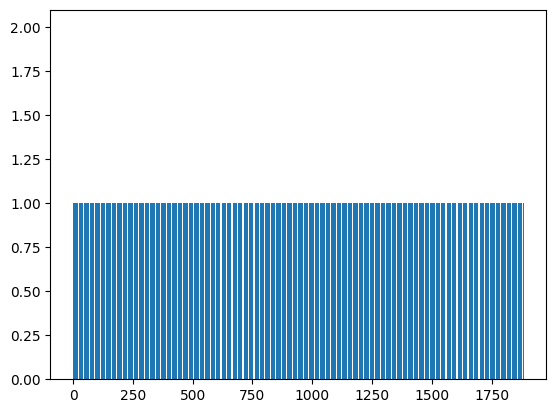

[(datetime.timedelta(days=75), datetime.timedelta(days=94, seconds=53671, microseconds=164907)), (datetime.timedelta(days=144), datetime.timedelta(days=156, seconds=49392, microseconds=924040)), (datetime.timedelta(days=825), datetime.timedelta(days=841, seconds=1597, microseconds=187895)), (datetime.timedelta(days=851), datetime.timedelta(days=862, seconds=24469, microseconds=264268)), (datetime.timedelta(days=962), datetime.timedelta(days=976, seconds=33452, microseconds=39415)), (datetime.timedelta(days=1185), datetime.timedelta(days=1200, seconds=31969, microseconds=857786)), (datetime.timedelta(days=1459), datetime.timedelta(days=1467, seconds=81921, microseconds=912778)), (datetime.timedelta(days=3184), datetime.timedelta(days=3199, seconds=16488, microseconds=464530))]


In [5]:
# histogram of go-out frequency

data_folder_name = "test_data_1"
path = layout_data_path / "test_layout" / data_folder_name
train_AS = utils.pickle_load(path, "AS")[:10000]
step = timedelta(days=1)
go_out_counts = analysis.generate_block_time_histogram_of_activities(
    train_AS, ["Sleep"], step, start=None, end=None, target="frequency"
)
x_list = list(
    np.arange(
        len(list(utils.date_generator(train_AS[0].start, train_AS[-1].end, step)))
    )
)
plt.bar(x_list, go_out_counts)
plt.show()
plt.close()

AL_periods = analysis.make_AL_periods(path)
print(AL_periods[anomaly_model.BEING_HOUSEBOUND])

In [19]:
_type = "raw"
data_folder_name = "test_data_1"
path = layout_data_path / "test_layout" / data_folder_name
train_SD = utils.pickle_load(path / "experiment1", f"SD_mat_{_type}_1")
print(train_SD[0])

[False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False]


In [29]:
def estimate_go_out_freq(data, sensor_id):
    """

    Parameters
    ----------
    data : numpy.ndarray
        duration time between data[i-1] and data[i] is 1 second.
    sensor_id : int

    Returns
    -------
    counts : list of int
        counts[i] is the number of go out in ith day.
    """
    sec_of_day = 60 * 60 * 24
    max_days = data.shape[0] / sec_of_day
    counts = []
    past_time = None
    num = 0
    for i, x in enumerate(data):
        if x[sensor_id]:
            present_time = timedelta(seconds=i)
            if past_time != None:
                if present_time - past_time > timedelta(minutes=3):
                    num += 1
            past_time = present_time
        temp = x.copy()
        temp[2] = False
        if np.any(temp):
            past_time = None

        if (i != 0) and (i % sec_of_day == 0):
            utils.print_progress_bar(
                max_days, i / sec_of_day, "estimate go out frequency"
            )
            counts.append(num)
            num = 0

    return counts


estimate_go_out_freq(train_SD[: 60 * 60 * 24 * 7], 0)

[0, 0, 0, 0, 0, 0]

In [28]:
go_out_counts

[4,
 4,
 2,
 4,
 5,
 4,
 6,
 3,
 4,
 3,
 3,
 5,
 7,
 5,
 4,
 3,
 4,
 4,
 1,
 4,
 2,
 4,
 5,
 4,
 1,
 6,
 9,
 5,
 3,
 4,
 5,
 6,
 3,
 6,
 4,
 3,
 2,
 4,
 3,
 8,
 2,
 5,
 4,
 5,
 8,
 1,
 2,
 4,
 4,
 2,
 5,
 7,
 1,
 2,
 3,
 6,
 6,
 6,
 5,
 4,
 4,
 4,
 3,
 5,
 2,
 5,
 6,
 7,
 9,
 2,
 3,
 4,
 3,
 0,
 3,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 3,
 4,
 6,
 5,
 6,
 2,
 6,
 4,
 8,
 4,
 5,
 2,
 5,
 4,
 4,
 4,
 3,
 4,
 6,
 5,
 5,
 2,
 3,
 7,
 2,
 3,
 3,
 0,
 4,
 7,
 2,
 7,
 4,
 2,
 4,
 5,
 5,
 3,
 3,
 3,
 3,
 4,
 3,
 2,
 3,
 4,
 4,
 6,
 6,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 5,
 5,
 4,
 9,
 4,
 4,
 2,
 3,
 5,
 3,
 1,
 5,
 7,
 7,
 5,
 8,
 5,
 2,
 7,
 4,
 8,
 7,
 8,
 3,
 2,
 5,
 1,
 2,
 1,
 3,
 5,
 5,
 4]

### Dynamic naive Bayes

In [2]:
from sklearn.metrics import classification_report, confusion_matrix

# learn dynamic naive Bayes
_type = "raw"
data_folder_name = "test_data_1"
path = layout_data_path / "test_layout" / data_folder_name
training_SD = utils.pickle_load(path / "experiment1", f"reduced_SD_mat_{_type}_1")
training_AL = utils.pickle_load(path / "experiment1", f"reduced_AL_mat_{_type}_1")
# SD_names = utils.pickle_load(path / 'experiment1', 'SD_names')
# AL_names = utils.pickle_load(path / 'experiment1', 'AL_names')

NB = analysis.NaiveBayes()
NB.use_log_prob = True
NB.fit(training_SD, training_AL[:, 3])

# print(NB.predict_states(training_SD[:30]))

# test Naive Bayes
data_folder_name = "test_data_2"
path = layout_data_path / "test_layout" / data_folder_name
test_SD = utils.pickle_load(path / "experiment1", f"reduced_SD_mat_{_type}_1")
test_AL = utils.pickle_load(path / "experiment1", f"reduced_AL_mat_{_type}_1")
# test_SD_names = utils.pickle_load(path / 'experiment1', 'SD_names')
# test_AL_names = utils.pickle_load(path / 'experiment1', 'AL_names')

(y_pred, prob) = NB.predict_states(test_SD)
y_true = test_AL[:, 3]
print(confusion_matrix(y_true, y_pred))
print(classification_report(y_true, y_pred))

[[74363690   694387]c naive Bayes. 75200000 / 75254508.
 [   81934   114497]]
              precision    recall  f1-score   support

       False       1.00      0.99      0.99  75058077
        True       0.14      0.58      0.23    196431

    accuracy                           0.99  75254508
   macro avg       0.57      0.79      0.61  75254508
weighted avg       1.00      0.99      0.99  75254508



### Hidden Markov model

In [3]:
from sklearn.metrics import classification_report, confusion_matrix

# learn HMM
_type = "raw"
data_folder_name = "test_data_1"
path = layout_data_path / "test_layout" / data_folder_name
train_SD = utils.pickle_load(path / "experiment1", f"reduced_SD_mat_{_type}_1")
train_AL = utils.pickle_load(path / "experiment1", f"reduced_AL_mat_{_type}_1")
train_SD_names = utils.pickle_load(path / "experiment1", "SD_names")
train_AL_names = utils.pickle_load(path / "experiment1", "AL_names")

hmm = analysis.HMM4binary_sensors()
hmm.use_log_prob = True
hmm.fit_with_true_hidden_states(train_SD, train_AL[:, 3])

# test HMM
data_folder_name = "test_data_2"
path = layout_data_path / "test_layout" / data_folder_name
test_SD = utils.pickle_load(path / "experiment1", f"reduced_SD_mat_{_type}_1")
test_AL = utils.pickle_load(path / "experiment1", f"reduced_AL_mat_{_type}_1")
test_SD_names = utils.pickle_load(path / "experiment1", "SD_names")
test_AL_names = utils.pickle_load(path / "experiment1", "AL_names")

temp_time = time.time()

(y_pred, prob) = hmm.predict_states(test_SD)

# print(hmm.C)
# print(hmm.A)
# print(hmm.P)

y_true = test_AL[:, 3]
print(confusion_matrix(y_true, y_pred))
print(classification_report(y_true, y_pred))
print("{:.2f} [s].".format(time.time() - temp_time))

[[73852137  1205940] in HMM. 75200000 / 75254508.
 [     642   195789]]
              precision    recall  f1-score   support

       False       1.00      0.98      0.99  75058077
        True       0.14      1.00      0.25    196431

    accuracy                           0.98  75254508
   macro avg       0.57      0.99      0.62  75254508
weighted avg       1.00      0.98      0.99  75254508

1505.18 [s].


In [2]:
# learn HMM
_type = "last-fired"
data_folder_name = "test_data_1"
path = layout_data_path / "test_layout" / data_folder_name
reduced_SD_mat = utils.pickle_load(path / "experiment1", f"reduced_SD_mat_{_type}_1")
reduced_AL_mat = utils.pickle_load(path / "experiment1", f"reduced_AL_mat_{_type}_1")
SD_names = utils.pickle_load(path / "experiment1", "SD_names")
AL_names = utils.pickle_load(path / "experiment1", "AL_names")
LF_vec = analysis.LF_mat2vec(reduced_SD_mat)
print(LF_vec[:100])

hmm = analysis.HMM4categorical()
hmm.fit_with_true_hidden_states(LF_vec, reduced_AL_mat[:, 3])

# test HMM
from sklearn.metrics import classification_report, confusion_matrix

_type = "last-fired"
data_folder_name = "test_data_2"
path = layout_data_path / "test_layout" / data_folder_name
test_SD = utils.pickle_load(path / "experiment1", f"reduced_SD_mat_{_type}_1")
test_AL = utils.pickle_load(path / "experiment1", f"reduced_AL_mat_{_type}_1")
test_SD_names = utils.pickle_load(path / "experiment1", "SD_names")
test_AL_names = utils.pickle_load(path / "experiment1", "AL_names")
test_LF_vec = analysis.LF_mat2vec(test_SD)
temp_time = time.time()

(state, prob) = hmm.predict_states(test_LF_vec)

print(hmm.C)
print(hmm.A)
print(hmm.P)

y_true = test_AL[:, 3]
y_pred = state
print(confusion_matrix(y_true, y_pred))
print(classification_report(y_true, y_pred))
print("{:.2f} [s].".format(time.time() - temp_time))

[28 28 28 28 28 28 28 28 28 28 28 28 28 28 28 28 28 28 28 28 28 28 28 28
 28 28 28 28 28 28 28 28 28 28 28 28 28 28 28 28 28 28 28 28 28 28 28 28
 28 28 28 28 28 28 28 28 28 28 28 28 23 22  2  3  2  3  4  4  5  9  9  9
  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9
  9  9  9  9]


In [13]:
# Training of HMM likelihood classifier
from hmmlearn import hmm

_type = "last-fired"
data_folder_name = "test_data_1"
path = layout_data_path / "test_layout" / data_folder_name
SD_mat = utils.pickle_load(path / "experiment1", f"reduced_SD_mat_{_type}_1")
AL_mat = utils.pickle_load(path / "experiment1", f"reduced_AL_mat_{_type}_1")
SD_names = utils.pickle_load(path / f"experiment1", "SD_names")
AL_names = utils.pickle_load(path / "experiment1", "AL_names")
LF_vec = analysis.LF_mat2vec(SD_mat)
HMM = analysis.HMM_likelihood_classifier()
n_components = 18
HMM.fit(n_components, SD_mat, AL_mat[:, 3])

# Test of HMM likelihood classifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

_type = "last-fired"
data_folder_name = "test_data_2"
path = layout_data_path / "test_layout" / data_folder_name
test_SD_mat = utils.pickle_load(path / "experiment1", f"reduced_SD_mat_{_type}_1")
test_AL_mat = utils.pickle_load(path / "experiment1", f"reduced_AL_mat_{_type}_1")
SD_names = utils.pickle_load(path / "experiment1", "SD_names")
test_AL_names = utils.pickle_load(path / "experiment1", "AL_names")
w = 61
half_w = int((w - 1) / 2)
y_pred = HMM.sequential_labeling(test_SD_mat, w)
y_true = test_AL_mat[half_w : int(test_SD_mat.shape[0] - half_w), 3]
print(accuracy_score(y_true, y_pred))
print(confusion_matrix(y_true, y_pred))
print(classification_report(y_true, y_pred))

In [3]:
# Hidden Markov model
# tutorial of hmmlearn: https://hmmlearn.readthedocs.io/en/latest/tutorial.html
# hmmlearn for multi-output sequences: https://github.com/hmmlearn/hmmlearn/issues/128
# multi-dimensional output: https://stackoverflow.com/questions/17487356/hidden-markov-model-for-multiple-observed-variables
import numpy as np
from hmmlearn import hmm

# Single one-dimensional time-series data
print("Single one-dimensional time-series data")
X_train = np.random.randint(0, 1, size=(100, 1))
X_test = np.random.randint(0, 1, size=(10, 1))
model = hmm.CategoricalHMM(n_components=2).fit(X_train)
logprob, state_sequence = model.decode(X_test)
print(np.exp(logprob))
print(state_sequence)

# Single multi-dimensional time-series data  ->  Dynamic naive bayes classifier
print("\nSingle multi-dimensional time-series data")
X_train = np.random.randint(0, 1, size=(100, 2))
X_test = np.random.randint(0, 1, size=(10, 2))

# Multiple one-dimensional time-series data
print("\nMultiple one-dimensional time-series data")
X_train_1 = np.random.randint(0, 1, size=(100, 1)).reshape((100, 1))
X_train_2 = np.random.randint(0, 1, size=(200, 1)).reshape((200, 1))
X_train = np.concatenate([X_train_1, X_train_2])
lengths = np.array([len(X_train_1), len(X_train_2)])
X_test = np.random.randint(0, 1, size=(20, 1))
model = hmm.CategoricalHMM(n_components=2).fit(X_train, lengths)
logprob, state_sequence = model.decode(X_test)
print(np.exp(logprob))
print(state_sequence)

# Multiple multi-dimensional time-series data
print("\nMultiple multi-dimensional time-series data")
X_train_1 = np.random.random((10, 3))
X_train_2 = np.random.random((5, 3))
X_train = np.concatenate([X_train_1, X_train_2])
lengths = np.array([len(X_train_1), len(X_train_2)])
model = hmm.GaussianHMM(n_components=2).fit(
    X_train, lengths
)  # multidimensional gaussian

X_test = np.array([[0, 1, 0], [1, 0, 0]])
logprob, state_sequence = model.decode(X_test)
print(np.exp(logprob))
print(state_sequence)

Single one-dimensional time-series data
0.18904007841994036
[0 0 0 0 0 0 0 0 0 0]

Single multi-dimensional time-series data

Multiple one-dimensional time-series data
0.5544686707439423
[0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1]

Multiple multi-dimensional time-series data
6.937229228472007e-06
[1 1]


C:\Users\tanakai\miniconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [4]:
# windows matrix

path = Path(layout_data_path / "test_layout" / "test_data_1")  # data path

indexes = list(range(28))

time = timedelta(seconds=41904)
duration = timedelta(seconds=10)
rate = timedelta(seconds=0.1)
mat = analysis.window_matrix(SD, time, duration, rate, indexes)

print(mat.shape)
print(np.sum(mat))
print(mat)

a = analysis.label_vector(AL_periods, timedelta(days=77, seconds=29020))
print(a)

analysis.matrix2image(path, "window_matrix", mat)

(28, 100)
125
[[False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [False False False ... False False False]
 [False False False ... False False False]
 [False False False ...  True  True  True]]
[False  True False  True False False]


In [4]:
# matrix before a wandering
wandering_index = 50
test_wandering = AL_periods[anomaly_model.WANDERING][wandering_index]
print(test_wandering[1] - test_wandering[0])
indexes = list(range(28))
duration = timedelta(seconds=60)
rate = timedelta(seconds=0.1)
sum_mat = analysis.window_matrix(SD, test_wandering[0], duration, rate, indexes)
sum_mat = np.zeros((sum_mat.shape[0], sum_mat.shape[1]))
count = 0
for t in utils.date_generator(
    test_wandering[0], test_wandering[1], timedelta(seconds=1)
):
    sum_mat += analysis.window_matrix(SD, t, duration, rate, indexes)
    count += 1
analysis.matrix2image(
    path, "before_wandering{}".format(wandering_index), sum_mat / count
)

0:01:12


In [ ]:
# matrix before a wandering
wandering_index = 0
test_wandering = AL_periods[anomaly_model.WANDERING][wandering_index]
print(test_wandering[1] - test_wandering[0])
indexes = list(range(28))
duration = timedelta(seconds=60)
rate = timedelta(seconds=0.1)
sum_mat = analysis.window_matrix(SD, test_wandering[0], duration, rate, indexes)
sum_mat = np.zeros((sum_mat.shape[0], sum_mat.shape[1]))
count = 0
for t in utils.date_generator(
    test_wandering[0], test_wandering[1], timedelta(seconds=1)
):
    sum_mat += analysis.window_matrix(SD, t, duration, rate, indexes)
    count += 1
analysis.matrix2image(
    path, "before_wandering{}".format(wandering_index), sum_mat / count
)

In [12]:
# label correlation
start_time = timedelta(days=0)
end_time = timedelta(days=9 * 360)
count = 0
sum_mat = np.zeros((6, 6))
progress_bar_step = timedelta(days=1)
temp_time = start_time
for t in utils.date_generator(start_time, end_time, timedelta(seconds=30)):
    if t - temp_time > progress_bar_step:
        temp_time = t
        utils.print_progress_bar(
            end_time, t, "Calculate the co-occurrence matrix of labels."
        )
    count += 1
    vec = analysis.label_vector(AL_periods, t)
    vec = vec.reshape((len(vec), 1))
    sum_mat += vec @ (vec.T)
analysis.matrix2image(path, "label_cooccurrence", sum_mat / count)

# Experiments

- 部分的なセンサの時系列パターン [1] D. J. Cook, N. C. Krishnan and P. Rashidi, "Activity Discovery and Activity Recognition: A New Partnership," in IEEE Transactions on Cybernetics, vol. 43, no. 3, pp. 820-828,
- 単位時間におけるセンサの反応頻度，推定した移動距離，無反応時間間隔 [2] Detection of Abnormal Living Patterns for Elderly Living Alone Using Support Vector Data Description
- センサ位置から推定した滞在箇所，滞在継続時間 [3] Anomaly Detection Algorithm Based on Life Pattern Extraction from Accumulated Pyroelectric Sensor Data
上記のものや特徴量選択
- ベクトル化 [4] Activity2vec, [5] sensor2vec

to do
- [2] の特徴量を抽出する関数の作成
- センサデータからの場所列の推定（行動認識）
- [3] を実験できるか試す
- 今までのアイデアをまとめる。サンプリング幅の異なる複数異常をオンラインに検出するアルゴリズムを作りたい。サンプリング幅の次元を追加する？
- Toy dataset を作って確かめる必要があるかどうか